# Trabalho 3 - Machine Learning

Autor: Asley Lioba Caldas


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random

In [117]:
df = pd.read_csv('./dataset.csv')


In [118]:
df

,Empresa,Salario,Classe,Sede,Tamanho,Fundação,Tipo,Setor,Moeda,Valor_moeda
0,Itaú Unibanco (Itaú BBA e Rede),8580,Pleno,"Rio de Janeiro, Brasil",25,NaN,Franquia,Desconhecido/Não se aplica,R$,1
1,Itaú Unibanco (Itaú BBA e Rede),6874,Junior,"São Paulo, Brasil",125,2016.0,Empresa: privada,Empréstimos,R$,1
2,Banco Bradesco,5984,Junior,"Campinas, Brasil",25,NaN,Empresa: privada,Publicidade e marketing,R$,1
3,Itaú Unibanco (Itaú BBA e Rede),11764,Senior,"Massy, França",10000,1958.0,Empresa: privada,Lojas de artigos gerais e grandes lojas,R$,1
4,Semantix,3773,Junior,"Brasília, Brasil",350,2017.0,Empresa: privada,Serviços de TI,R$,1
...,...,...,...,...,...,...,...,...,...,...
384,XP Inc.,9541,Senior,"Fortaleza, Brasil",350,2001.0,Organização sem fins lucrativos,Serviços de TI,R$R$,1
385,Softplan,8958,Senior,"Barueri, Brasil",350,2014.0,Empresa: privada,Processamento de transações financeiras,R$R$,1
386,Netflix,51333,Senior,"Florianópolis, Brasil",350,2009.0,Empresa: privada,Hardware e software,R$R$,1
387,Technip,10041,Senior,"Vitória, Brasil",2500,2012.0,Empresa: privada,Processamento de transações financeiras,R$R$,1


In [5]:
import numpy as np
def remove_outliers(df, standard_deviations=2):
    df_mean = df.mean()
    df_std = df.std()
    return df[df.apply(lambda x: np.abs(x - df_mean) <= standard_deviations*df_std)]

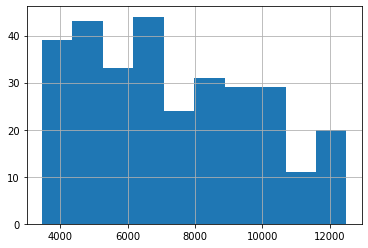

In [6]:
remove_outliers(df['Salario'], standard_deviations=1).hist()

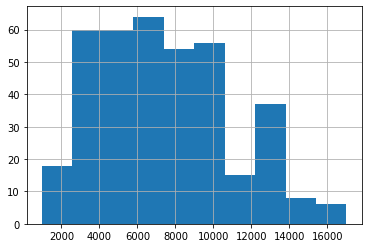

In [7]:
remove_outliers(df['Salario'], standard_deviations=2).hist()

In [8]:
dfj = df[df['Classe'] == 'Junior']
dfp = df[df['Classe'] == 'Pleno']
dfs = df[df['Classe'] == 'Senior']


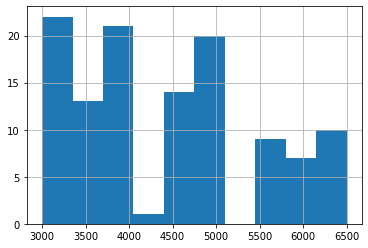

In [9]:
remove_outliers(dfj['Salario'], standard_deviations=1).hist()

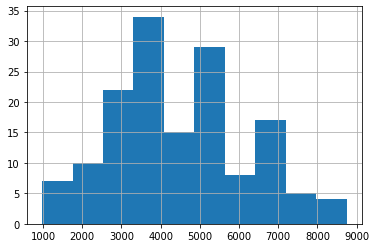

In [10]:
remove_outliers(dfj['Salario'], standard_deviations=2).hist()

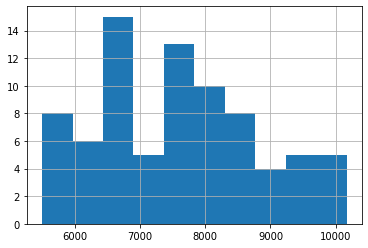

In [11]:
remove_outliers(dfp['Salario'], standard_deviations=1).hist()

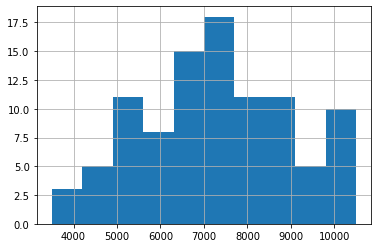

In [12]:
remove_outliers(dfp['Salario'], standard_deviations=2).hist()

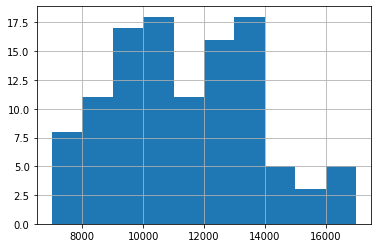

In [13]:
remove_outliers(dfs['Salario'], standard_deviations=1).hist()

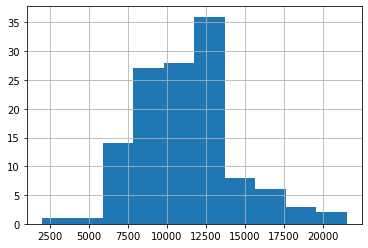

In [14]:
remove_outliers(dfs['Salario'], standard_deviations=2).hist()

In [15]:
df['Classe'] = [w.replace('Senior', '3') for w in df['Classe']]
df['Classe'] = [w.replace('Pleno', '2') for w in df['Classe']]
df['Classe'] = [w.replace('Junior', '1') for w in df['Classe']]
df['Classe'] = df['Classe'].astype(int)

In [16]:
from sklearn.linear_model import LinearRegression

X= df[['Salario']]
y = df['Tamanho']

In [17]:
modelskl = LinearRegression()

In [18]:
modelskl.fit(X,y)

LinearRegression()

In [19]:
modelskl.coef_

array([0.05814804])

In [20]:
modelskl.intercept_

3116.6858491256803

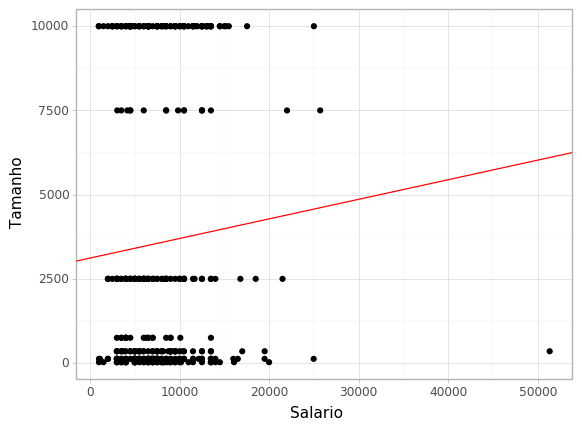

<ggplot: (-9223371898256455484)>

In [21]:
from plotnine import *

(ggplot(df,aes('Salario','Tamanho'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=modelskl.intercept_ , slope=modelskl.coef_[0], color='red')
)

In [22]:
from sklearn.linear_model import LinearRegression

X= df[['Salario']]
y = df['Classe']

In [23]:
modelskl = LinearRegression()

In [24]:
modelskl.fit(X,y)

LinearRegression()

In [25]:
modelskl.coef_

array([0.000121])

In [26]:
modelskl.intercept_

0.9751161806401484

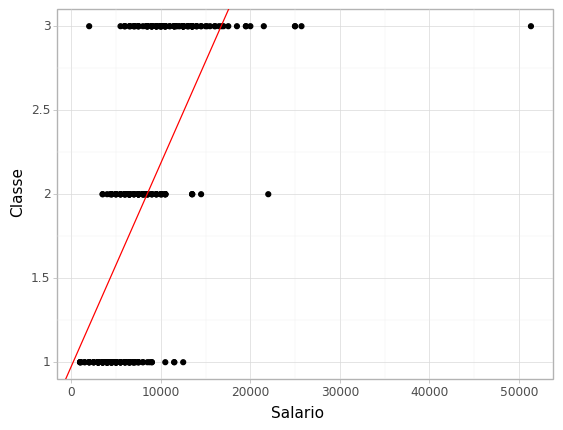

<ggplot: (-9223371898256907024)>

In [27]:
from plotnine import *

(ggplot(df,aes('Salario','Classe'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=modelskl.intercept_ , slope=modelskl.coef_[0], color='red')
)

In [28]:
df['Classe'].unique()

array([2, 1, 3])

In [29]:
df['Classe'].describe()

count    389.000000
mean       1.930591
std        0.857240
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Classe, dtype: float64

# Regressão Linear Multivariada

In [30]:
junior = []
pleno = []
senior = []

juniorS = []
plenoS = []
seniorS = []

juniorT = []
plenoT = []
seniorT = []

In [31]:
dfj = df.loc[df['Classe']==1]
dfp = df.loc[df['Classe']==2]
dfs = df.loc[df['Classe']==3]


In [32]:
j = list(dfj['Classe'])
p = list(dfp['Classe'])
s = list(dfs['Classe'])

js = list(dfj['Salario'])
ps = list(dfp['Salario'])
ss = list(dfs['Salario'])

jt = list(dfj['Tamanho'])
pt = list(dfp['Tamanho'])
st = list(dfs['Tamanho'])

In [33]:
len(p)

102

In [34]:
#Undersampling
for x in range(102):
    junior.append(j[x])
    juniorS.append(js[x])
    juniorT.append(jt[x])
    
    pleno.append(p[x])
    plenoS.append(ps[x])
    plenoT.append(pt[x])
    
    senior.append(s[x])
    seniorS.append(ss[x])
    seniorT.append(st[x])

In [35]:
df_j = pd.DataFrame(list(zip(junior,juniorS,juniorT)), columns = ['Classe','Salario','Tamanho'])

In [36]:
df_p = pd.DataFrame(list(zip(pleno,plenoS,plenoT)), columns = ['Classe','Salario','Tamanho'])

In [37]:
df_s = pd.DataFrame(list(zip(senior,seniorS,seniorT)), columns = ['Classe','Salario','Tamanho'])

In [38]:
df_total = pd.concat([df_j, df_p, df_s])

In [39]:
len(df_total)

306

In [40]:
#usando a eliminação de outliers
import numpy as np
def remove_outliers(df, standard_deviations=2):
    df_mean = df.mean()
    df_std = df.std()
    return df[df.apply(lambda x: np.abs(x - df_mean) <= standard_deviations*df_std)]

In [41]:
xj = remove_outliers(df_j['Salario'], standard_deviations=1)
yj = remove_outliers(df_j['Tamanho'], standard_deviations=1)

xp = remove_outliers(df_p['Salario'], standard_deviations=1)
yp = remove_outliers(df_p['Tamanho'], standard_deviations=1)

xs = remove_outliers(df_s['Salario'], standard_deviations=1)
ys = remove_outliers(df_s['Tamanho'], standard_deviations=1)

In [42]:
jun = pd.DataFrame(list(zip(junior,xj,yj)), columns = ['Classe','Salario','Tamanho'])
ple = pd.DataFrame(list(zip(pleno,xp,yp)), columns = ['Classe','Salario','Tamanho'])
sen = pd.DataFrame(list(zip(senior,xs,ys)), columns = ['Classe','Salario','Tamanho'])

In [43]:
len(sen)

63

In [44]:
df_total = pd.concat([jun, ple, sen])

In [45]:
len(df_total)

215

In [47]:
j2 = list(jun['Classe'])
p2 = list(ple['Classe'])
s2 = list(sen['Classe'])

js2 = list(jun['Salario'])
ps2 = list(ple['Salario'])
ss2 = list(sen['Salario'])

jt2 = list(jun['Tamanho'])
pt2 = list(ple['Tamanho'])
st2 = list(sen['Tamanho'])

In [48]:
len(st2)

63

In [49]:
junior2 = []
pleno2 = []
senior2 = []

juniorS2 = []
plenoS2 = []
seniorS2 = []

juniorT2 = []
plenoT2 = []
seniorT2 = []

In [50]:
#Undersampling

for x in range(63):
    junior2.append(j2[x])
    juniorS2.append(js2[x])
    juniorT2.append(jt2[x])
    
    pleno2.append(p2[x])
    plenoS2.append(ps2[x])
    plenoT2.append(pt2[x])
    
    senior2.append(s2[x])
    seniorS2.append(ss2[x])
    seniorT2.append(st2[x])

In [51]:
df_j2 = pd.DataFrame(list(zip(junior2,juniorS2,juniorT2)), columns = ['Classe','Salario','Tamanho'])

df_p2 = pd.DataFrame(list(zip(pleno2,plenoS2,plenoT2)), columns = ['Classe','Salario','Tamanho'])

df_s2 = pd.DataFrame(list(zip(senior2,seniorS2,seniorT2)), columns = ['Classe','Salario','Tamanho'])

In [52]:
len(df_j2)

63

In [53]:
df_total2 = pd.concat([df_j2, df_p2, df_s2])

In [54]:
len(df_total2)

189

In [55]:
import sklearn
df_shuffled2=sklearn.utils.shuffle(df_total2)
#print(df_shuffled)

In [56]:
#fim da remodalegem teste

In [57]:
X = df_shuffled2[['Classe', 'Tamanho']] #antes seria apenas df
y = df_shuffled2['Salario']

In [58]:
len(df_shuffled2)

189

In [59]:
X = pd.get_dummies(X, columns=['Tamanho', 'Classe'], prefix="", prefix_sep='') # 74, sem 79

In [60]:
X

,25,125,350,750,2500,7500,1,2,3
18,0,0,0,0,1,0,1,0,0
39,0,0,1,0,0,0,1,0,0
13,1,0,0,0,0,0,1,0,0
16,0,0,0,0,1,0,1,0,0
38,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
44,0,0,0,0,1,0,1,0,0
23,0,1,0,0,0,0,0,1,0
11,0,1,0,0,0,0,1,0,0
27,0,0,0,0,1,0,1,0,0


In [61]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

#r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8179377330439119

In [62]:
output = pipe.predict(X_test)

In [63]:
output

array([ 7864.76577146,  7528.87956533,  7528.87956533,  4917.56948339,
        6715.54514233,  4978.35934333,  7864.76577146,  7864.76577146,
       10729.11979728,  5049.35860814, 11603.24408022,  4917.56948339,
       10729.11979728,  4978.35934333,  4978.35934333,  7528.87956533,
       11542.45422028,  7589.66942527, 10729.11979728,  7589.66942527,
        7864.76577146,  4104.23506039,  7589.66942527, 11542.45422028,
        6715.54514233,  4917.56948339, 11603.24408022,  7589.66942527,
       11542.45422028,  4917.56948339,  7528.87956533, 11674.24334503,
        4917.56948339, 11542.45422028, 10729.11979728,  4917.56948339,
       10729.11979728, 11542.45422028,  4978.35934333, 11878.34042641,
        4978.35934333, 10333.33333333,  4978.35934333, 11878.34042641,
        4978.35934333,  4104.23506039, 11878.34042641, 11542.45422028,
       11878.34042641,  4104.23506039, 11603.24408022,  4978.35934333,
        4917.56948339,  7589.66942527,  5253.45568953, 11603.24408022,
      

In [64]:
classe = X_test[['1', '2', '3']].idxmax(axis=1)
tamanho = X_test[['25',  '125',  '350', '750', '2500', '7500']].idxmax(axis=1)

In [65]:
output =output.astype(int)

In [66]:
results = pd.DataFrame(list(zip(output, y_test, classe, tamanho)), columns = ['Salario_Pred','Salario','Classe', 'Tamanho'])

In [67]:
results[['Classe', 'Tamanho']] = results[['Classe', 'Tamanho']].astype(int)

In [68]:
results_sort = results.sort_values(['Tamanho', 'Classe'])

In [69]:
results_sort

,Salario_Pred,Salario,Classe,Tamanho
54,5253,7000,1,25
0,7864,8000,2,25
6,7864,5500,2,25
7,7864,6500,2,25
20,7864,6500,2,25
39,11878,11764,3,25
43,11878,12500,3,25
46,11878,13500,3,25
48,11878,11676,3,25
3,4917,6500,1,125


C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


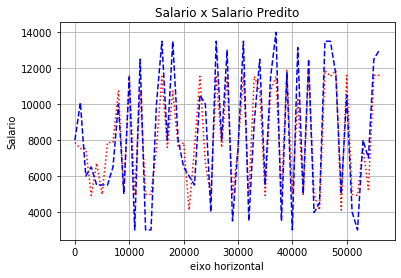

In [70]:
import numpy as np
import matplotlib.pyplot as plt


data1 = output
data2 = y_test
x = 1000*np.array(range(len(data1)))

#plt.plot( x, data1, 'go') # green bolinha
plt.plot( x, data1, 'k:', color='red') # linha pontilha orange

#original
#plt.plot( x, data2, 'r^') # red triangulo
plt.plot( x, data2, 'k--', color='blue')  # linha tracejada azul

#plt.axis([800, 20000, 800, 16000])
plt.title("Salario x Salario Predito")

plt.grid(True)
plt.xlabel("eixo horizontal")
plt.ylabel("Salario")
plt.show()

In [71]:
# teste com ordenado

In [72]:
len(results_sort)

57

In [73]:
results_sort = results_sort.iloc[:-1]

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


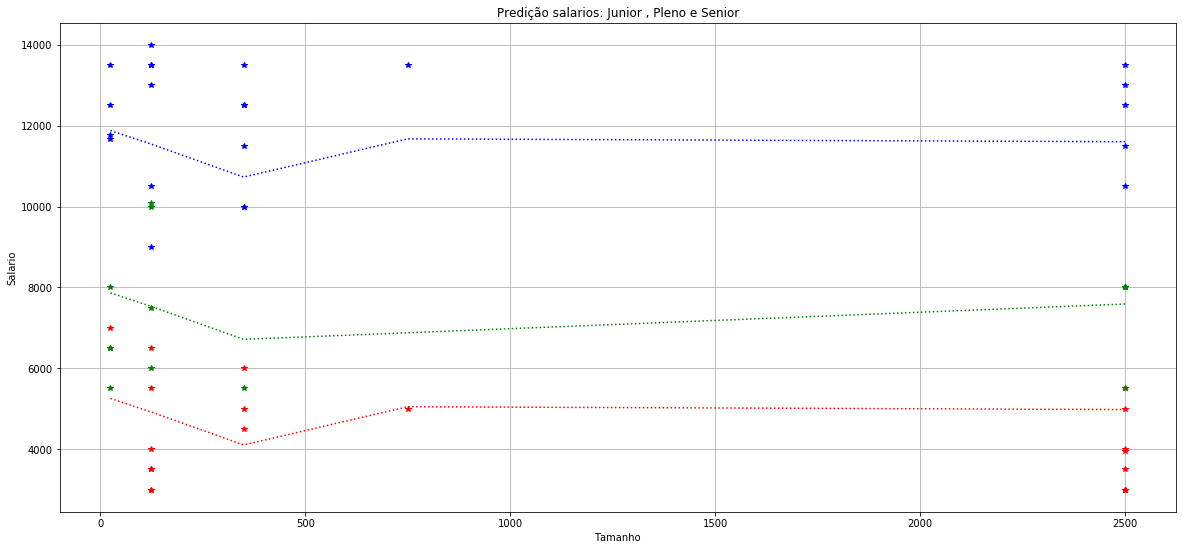

In [74]:
import numpy as np
import matplotlib.pyplot as plt

data1 = results_sort['Salario_Pred']
data2 = results_sort['Salario']

colors = ['red', 'green', 'blue']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 9)

for idx, classe in enumerate(results_sort['Classe'].unique()):
    current_data = results_sort.loc[results_sort['Classe'] == classe]

    x = 1000*np.array(range(len(current_data)))
    x = current_data['Tamanho']

    #plt.plot( x, data1, 'go') # green bolinha
    plt.plot( x, current_data['Salario_Pred'], 'k:', color=colors[idx]) 
    plt.plot( x, current_data['Salario'], 'k*', color=colors[idx]) 


#plt.axis([0, 7, 800, 16000])
plt.title("Predição salarios: Junior , Pleno e Senior")

plt.grid(True)
plt.xlabel("Tamanho")
plt.ylabel("Salario")

plt.show()


In [75]:
# outliers = 2

In [76]:
df_j = pd.DataFrame(list(zip(junior,juniorS,juniorT)), columns = ['Classe','Salario','Tamanho'])

df_p = pd.DataFrame(list(zip(pleno,plenoS,plenoT)), columns = ['Classe','Salario','Tamanho'])

df_s = pd.DataFrame(list(zip(senior,seniorS,seniorT)), columns = ['Classe','Salario','Tamanho'])

df_total = pd.concat([df_j, df_p, df_s])

In [77]:
#usando a eliminação de outliers
import numpy as np
def remove_outliers(df, standard_deviations=2):
    df_mean = df.mean()
    df_std = df.std()
    return df[df.apply(lambda x: np.abs(x - df_mean) <= standard_deviations*df_std)]

In [78]:
xj = remove_outliers(df_j['Salario'], standard_deviations=2)
yj = remove_outliers(df_j['Tamanho'], standard_deviations=2)

xp = remove_outliers(df_p['Salario'], standard_deviations=2)
yp = remove_outliers(df_p['Tamanho'], standard_deviations=2)

xs = remove_outliers(df_s['Salario'], standard_deviations=2)
ys = remove_outliers(df_s['Tamanho'], standard_deviations=2)

In [79]:
jun = pd.DataFrame(list(zip(junior,xj,yj)), columns = ['Classe','Salario','Tamanho'])
ple = pd.DataFrame(list(zip(pleno,xp,yp)), columns = ['Classe','Salario','Tamanho'])
sen = pd.DataFrame(list(zip(senior,xs,ys)), columns = ['Classe','Salario','Tamanho'])

In [80]:
df_total = pd.concat([jun, ple, sen])

In [81]:
j2 = list(jun['Classe'])
p2 = list(ple['Classe'])
s2 = list(sen['Classe'])

js2 = list(jun['Salario'])
ps2 = list(ple['Salario'])
ss2 = list(sen['Salario'])

jt2 = list(jun['Tamanho'])
pt2 = list(ple['Tamanho'])
st2 = list(sen['Tamanho'])

In [82]:
junior2 = []
pleno2 = []
senior2 = []

juniorS2 = []
plenoS2 = []
seniorS2 = []

juniorT2 = []
plenoT2 = []
seniorT2 = []

In [83]:
len(p2)

97

In [84]:
for x in range(96):
    junior2.append(j2[x])
    juniorS2.append(js2[x])
    juniorT2.append(jt2[x])
    
    pleno2.append(p2[x])
    plenoS2.append(ps2[x])
    plenoT2.append(pt2[x])
    
    senior2.append(s2[x])
    seniorS2.append(ss2[x])
    seniorT2.append(st2[x])

In [85]:
df_j2 = pd.DataFrame(list(zip(junior2,juniorS2,juniorT2)), columns = ['Classe','Salario','Tamanho'])

df_p2 = pd.DataFrame(list(zip(pleno2,plenoS2,plenoT2)), columns = ['Classe','Salario','Tamanho'])

df_s2 = pd.DataFrame(list(zip(senior2,seniorS2,seniorT2)), columns = ['Classe','Salario','Tamanho'])

In [86]:
df_total2 = pd.concat([df_j2, df_p2, df_s2])

In [87]:
import sklearn
df_shuffled2=sklearn.utils.shuffle(df_total2)

In [88]:
X = df_shuffled2[['Classe', 'Tamanho']] #antes seria apenas df
y = df_shuffled2['Salario']

In [89]:
len(df_shuffled2)

288

In [90]:
X = pd.get_dummies(X, columns=['Tamanho', 'Classe'], prefix="", prefix_sep='') # 74, sem 79

In [91]:
X

,25,125,350,750,2500,7500,10000,1,2,3
60,0,0,0,0,0,0,1,1,0,0
43,0,1,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,1,0,1,0
53,0,0,0,0,1,0,0,1,0,0
27,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,1,0,0,1,0,0
77,0,1,0,0,0,0,0,1,0,0
71,0,1,0,0,0,0,0,0,0,1
88,0,1,0,0,0,0,0,1,0,0


In [92]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5976128155463036

In [93]:
output = pipe.predict(X_test)

classe = X_test[['1', '2', '3']].idxmax(axis=1)
tamanho = X_test[['25',  '125',  '350', '750', '2500', '7500']].idxmax(axis=1)

output =output.astype(int)

results = pd.DataFrame(list(zip(output, y_test, classe, tamanho)), columns = ['Salario_Pred','Salario','Classe', 'Tamanho'])

results[['Classe', 'Tamanho']] = results[['Classe', 'Tamanho']].astype(int)

results_sort = results.sort_values(['Tamanho', 'Classe'])



In [94]:
results_sort

,Salario_Pred,Salario,Classe,Tamanho
0,4664,3500,1,25
6,4664,2500,1,25
9,4664,4500,1,25
10,4664,3500,1,25
21,3800,1500,1,25
...,...,...,...,...
57,11288,13500,3,2500
61,11288,11676,3,2500
81,11288,10500,3,2500
59,6776,8500,2,7500


In [95]:
results_sort = results_sort.iloc[:-3]

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


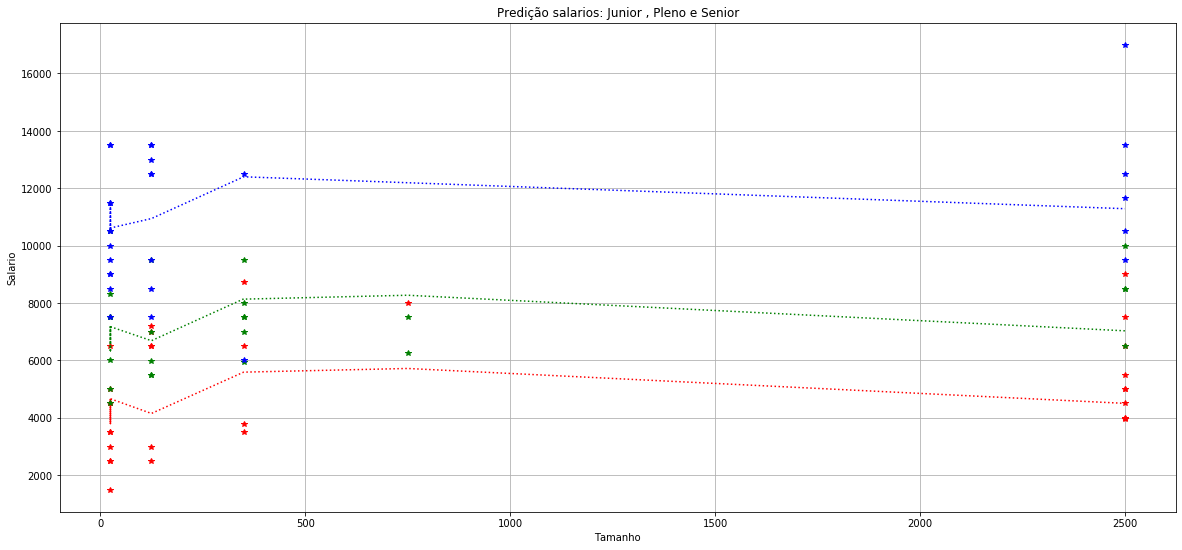

In [96]:
import numpy as np
import matplotlib.pyplot as plt

data1 = results_sort['Salario_Pred']
data2 = results_sort['Salario']


colors = ['red', 'green', 'blue']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 9)

for idx, classe in enumerate(results_sort['Classe'].unique()):
    current_data = results_sort.loc[results_sort['Classe'] == classe]

    x = 1000*np.array(range(len(current_data)))
    x = current_data['Tamanho']

    #plt.plot( x, data1, 'go') # green bolinha
    plt.plot( x, current_data['Salario_Pred'], 'k:', color=colors[idx]) 
    plt.plot( x, current_data['Salario'], 'k*', color=colors[idx]) 

    
#plt.axis([0,900,1000,20000])
plt.title("Predição salarios: Junior , Pleno e Senior")

plt.grid(True)
plt.xlabel("Tamanho")
plt.ylabel("Salario")

plt.show()


In [97]:
# sem remoção de outliers

In [98]:
df_j = pd.DataFrame(list(zip(junior,juniorS,juniorT)), columns = ['Classe','Salario','Tamanho'])

df_p = pd.DataFrame(list(zip(pleno,plenoS,plenoT)), columns = ['Classe','Salario','Tamanho'])

df_s = pd.DataFrame(list(zip(senior,seniorS,seniorT)), columns = ['Classe','Salario','Tamanho'])

df_total = pd.concat([df_j, df_p, df_s])

In [99]:
import sklearn
df_shuffled=sklearn.utils.shuffle(df_total)

In [100]:
X = df_shuffled[['Classe', 'Tamanho']] #antes seria apenas df
y = df_shuffled['Salario']

In [101]:
len(df_shuffled)

306

In [102]:
X = pd.get_dummies(X, columns=['Tamanho', 'Classe'], prefix="", prefix_sep='') # 74, sem 79

In [103]:
X

,25,125,350,750,2500,7500,10000,1,2,3
79,0,0,0,0,0,0,1,0,1,0
12,0,0,1,0,0,0,0,0,1,0
32,0,0,0,0,0,0,1,1,0,0
98,0,0,0,0,0,0,1,1,0,0
44,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
83,0,0,0,0,1,0,0,0,1,0
76,0,0,0,0,0,0,1,1,0,0
0,0,0,0,0,0,0,1,0,0,1
39,0,0,0,0,1,0,0,0,1,0


In [104]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

#com o dataset(nao remodelado, 103), com test 0,3 e sem dummies no tamanho, temos 81%
# dataset remodelado, 93 ; 84%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.48141762617942263

In [105]:
output = pipe.predict(X_test)

classe = X_test[['1', '2', '3']].idxmax(axis=1)
tamanho = X_test[['25',  '125',  '350', '750', '2500', '7500']].idxmax(axis=1)

output =output.astype(int)

results = pd.DataFrame(list(zip(output, y_test, classe, tamanho)), columns = ['Salario_Pred','Salario','Classe', 'Tamanho'])

results[['Classe', 'Tamanho']] = results[['Classe', 'Tamanho']].astype(int)

results_sort = results.sort_values(['Tamanho', 'Classe'])

In [106]:
results_sort

,Salario_Pred,Salario,Classe,Tamanho
9,3444,4000,1,25
17,4724,4000,1,25
51,4724,6500,1,25
74,4724,5500,1,25
82,4724,6500,1,25
...,...,...,...,...
63,12148,8000,3,2500
81,12148,13500,3,2500
84,12148,9500,3,2500
85,9652,10500,2,7500


In [107]:
results_sort = results_sort.iloc[:-1]

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


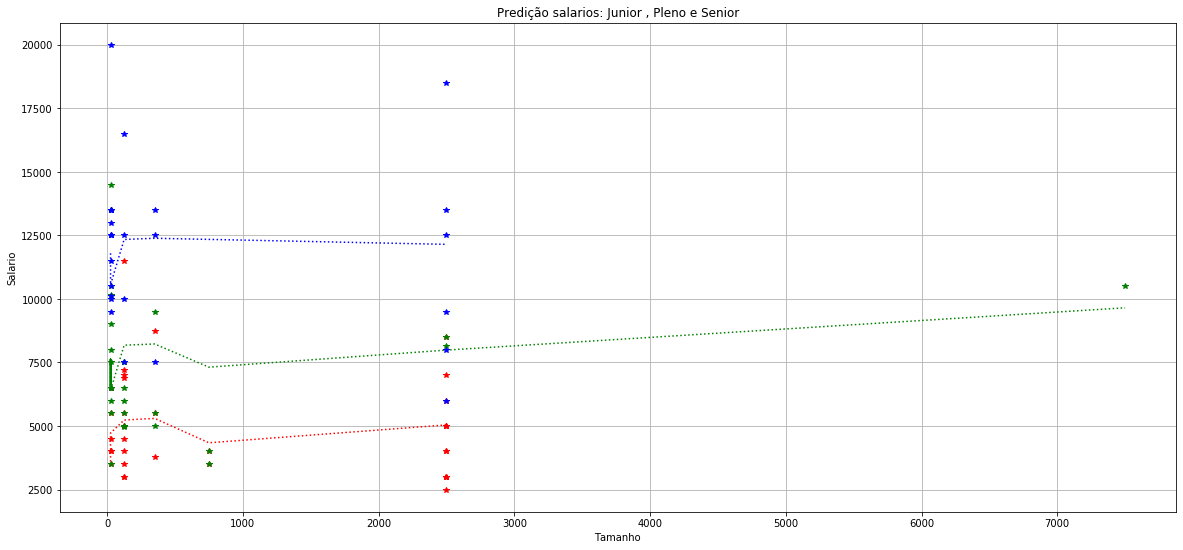

In [108]:
import numpy as np
import matplotlib.pyplot as plt

data1 = results_sort['Salario_Pred']
data2 = results_sort['Salario']


colors = ['red', 'green', 'blue']

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 9)

for idx, classe in enumerate(results_sort['Classe'].unique()):
    current_data = results_sort.loc[results_sort['Classe'] == classe]

    x = 1000*np.array(range(len(current_data)))
    x = current_data['Tamanho']

    #plt.plot( x, data1, 'go') # green bolinha
    plt.plot( x, current_data['Salario_Pred'], 'k:', color=colors[idx]) 
    plt.plot( x, current_data['Salario'], 'k*', color=colors[idx]) 

    
#plt.axis([0,900,1000,20000])
plt.title("Predição salarios: Junior , Pleno e Senior")

plt.grid(True)
plt.xlabel("Tamanho")
plt.ylabel("Salario")

plt.show()

In [109]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [110]:
clr = LogisticRegression()
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

In [111]:
print(classification_report(y_test, resultado_clr))

              precision    recall  f1-score   support

        2500       0.00      0.00      0.00         1
        3000       0.00      0.00      0.00         6
        3500       0.00      0.00      0.00         5
        3773       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         7
        4500       0.00      0.00      0.00         2
        4946       0.00      0.00      0.00         1
        5000       0.18      0.43      0.25         7
        5500       0.00      0.00      0.00         6
        6000       0.00      0.00      0.00         4
        6500       0.11      0.80      0.20         5
        6874       0.00      0.00      0.00         1
        7000       0.00      0.00      0.00         2
        7205       0.00      0.00      0.00         1
        7500       0.00      0.00      0.00         5
        8000       0.00      0.00      0.00         2
        8166       0.00      0.00      0.00         1
        8500       0.00    

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [112]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_test)

In [113]:
print(classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

         978       0.00      0.00      0.00         0
        2500       0.00      0.00      0.00         1
        3000       0.14      0.33      0.20         6
        3500       0.00      0.00      0.00         5
        3773       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         7
        4500       0.00      0.00      0.00         2
        4946       0.00      0.00      0.00         1
        5000       0.07      0.14      0.09         7
        5500       0.33      0.17      0.22         6
        6000       0.08      0.25      0.12         4
        6500       0.00      0.00      0.00         5
        6874       0.00      0.00      0.00         1
        7000       0.00      0.00      0.00         2
        7205       0.00      0.00      0.00         1
        7500       0.00      0.00      0.00         5
        8000       0.00      0.00      0.00         2
        8166       0.00    

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-d

In [114]:
# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)

In [115]:
print(classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

        2500       0.00      0.00      0.00         1
        3000       0.00      0.00      0.00         6
        3500       0.00      0.00      0.00         5
        3773       0.00      0.00      0.00         1
        4000       0.00      0.00      0.00         7
        4500       0.00      0.00      0.00         2
        4946       0.00      0.00      0.00         1
        5000       0.21      0.43      0.29         7
        5500       0.00      0.00      0.00         6
        6000       0.00      0.00      0.00         4
        6500       0.05      0.20      0.08         5
        6874       0.00      0.00      0.00         1
        7000       0.00      0.00      0.00         2
        7205       0.00      0.00      0.00         1
        7500       0.00      0.00      0.00         5
        8000       0.00      0.00      0.00         2
        8166       0.00      0.00      0.00         1
        8500       0.00    

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
